In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [40]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [44]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[-0.39871148,  1.08700609, -1.40772509, -1.30672051],
       [-0.28028233, -0.13664054,  0.17738091,  0.12708753],
       [-0.87242809,  1.82119407, -1.29450323, -1.17637432],
       [ 0.90400919, -0.38136987,  0.46043555,  0.12708753],
       [-1.10928639,  0.10808879, -1.29450323, -1.43706669],
       [-0.04342402, -0.87082852,  0.74349019,  0.90916464],
       [-1.583003  , -1.84974582, -1.40772509, -1.17637432],
       [-0.75399893,  2.55538205, -1.29450323, -1.43706669],
       [ 0.19343428, -0.13664054,  0.57365741,  0.77881846],
       [-1.70143215,  0.35281811, -1.40772509, -1.30672051],
       [-0.28028233, -0.13664054,  0.40382462,  0.3877799 ],
       [-0.99085724, -0.13664054, -1.2378923 , -1.30672051],
       [ 0.19343428, -2.09447515,  0.68687927,  0.3877799 ],
       [ 0.19343428, -0.38136987,  0.40382462,  0.3877799 ],
       [-0.04342402, -0.87082852,  0.17738091, -0.26395103],
       [-1.22771554,  0.10808879, -1.2378923 , -1.30672051],
       [ 1.25929665,  0.

In [48]:
X_test

array([[-2.80282326e-01, -8.70828519e-01,  2.33991838e-01,
         1.27087531e-01],
       [-1.70143215e+00, -1.36640541e-01, -1.40772509e+00,
        -1.30672051e+00],
       [-4.34240223e-02, -6.26099193e-01,  7.43490194e-01,
         1.56089557e+00],
       [ 1.02243834e+00,  1.08088786e-01,  3.47213695e-01,
         2.57433716e-01],
       [ 3.11863433e-01, -1.36640541e-01,  6.30268337e-01,
         7.78818457e-01],
       [-1.61853174e-01,  3.28957003e+00, -1.29450323e+00,
        -1.04602814e+00],
       [-1.61853174e-01,  1.82119407e+00, -1.18128137e+00,
        -1.17637432e+00],
       [ 1.25929665e+00,  1.08088786e-01,  6.30268337e-01,
         3.87779901e-01],
       [ 1.14086750e+00, -1.36640541e-01,  9.69933908e-01,
         1.16985701e+00],
       [-1.10928639e+00, -1.60501650e+00, -2.75506519e-01,
        -2.63951025e-01],
       [ 3.11863433e-01, -6.26099193e-01,  5.17046480e-01,
        -3.25865463e-03],
       [-5.17140630e-01,  2.06592340e+00, -1.18128137e+00,
      

Training and Predictions

In [49]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library.

In the second line, this class is initialized with one parameter, i.e. n_neigbours. 

This is basically the value for the K. 

There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data.

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

Evaluating the Algorithm

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print("*****************************************************************")
print()
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  1  8]]

*****************************************************************

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



##Comparing Error Rate with the K Value

In [53]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

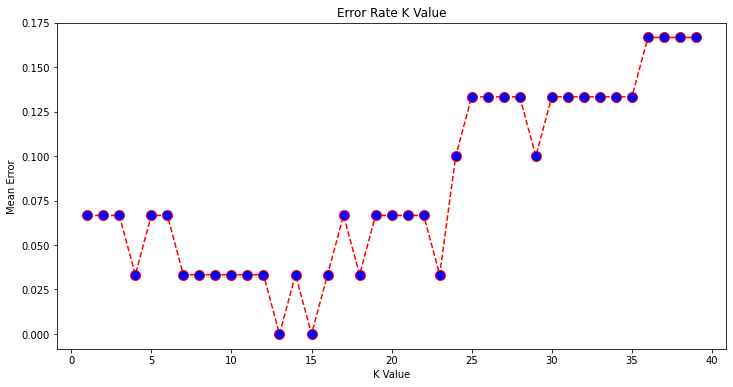

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')